# Stock Market Prediction 

This project is an attempt to predict the stock market indicator S&P 500 Index. The Standard and Poor's 500, or simply the S&P 500, is a free-float weighted measurement stock market index of 500 of the largest companies listed on stock exchanges in the United States. It is one of the most commonly followed equity indices.

We will use historical data from 1950 to 2021 on the price of the S&P500 Index to make predictions about future prices. Since stocks tend to correlate with how well the economy performs, knowing the index can also help with economic forecasts.

We will use Linear Regression for our purpose, so let us import all needed libraries and functions:

In [502]:
import pandas as pd
from datetime import datetime 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

We will use historical data, provided by the Dataquest community and more fresh data (2015-2021) from https://finance.yahoo.com/quote/%5EGSPC/history

In [503]:
data = pd.read_csv("sphist.csv")
dataS = pd.DataFrame(data)
dataS['Date']=pd.to_datetime(dataS['Date'])
dfSort = dataS.sort_values(by=['Date'], ascending=True).dropna(axis=0) 
print(dfSort.head())
dfSort.info()

            Date   Open   High    Low  Close     Volume  Adj Close
16589 1950-01-03  16.66  16.66  16.66  16.66  1260000.0      16.66
16588 1950-01-04  16.85  16.85  16.85  16.85  1890000.0      16.85
16587 1950-01-05  16.93  16.93  16.93  16.93  2550000.0      16.93
16586 1950-01-06  16.98  16.98  16.98  16.98  2010000.0      16.98
16585 1950-01-09  17.08  17.08  17.08  17.08  2520000.0      17.08
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16590 entries, 16589 to 0
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       16590 non-null  datetime64[ns]
 1   Open       16590 non-null  float64       
 2   High       16590 non-null  float64       
 3   Low        16590 non-null  float64       
 4   Close      16590 non-null  float64       
 5   Volume     16590 non-null  float64       
 6   Adj Close  16590 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 1.0 MB


In [504]:
data_after2015 = pd.read_csv("2016_21.csv")
data_after2015['Date']=pd.to_datetime(data_after2015['DateU'])
colum = dataS.columns.tolist()
data_2021 = data_after2015[colum]
print(data_2021.head())
data_2021.info()

        Date     Open     High      Low    Close      Volume  Adj Close
0 2021-05-27  4201.94  4213.38  4197.78  4200.88  5201110000    4200.88
1 2021-05-26  4191.59  4202.61  4184.11  4195.99  3674490000    4195.99
2 2021-05-25  4205.94  4213.42  4182.52  4188.13  3420870000    4188.13
3 2021-05-24  4170.16  4209.52  4170.16  4197.05  2947400000    4197.05
4 2021-05-21  4168.61  4188.72  4151.72  4155.86  3344620000    4155.86
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1360 entries, 0 to 1359
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1360 non-null   datetime64[ns]
 1   Open       1360 non-null   float64       
 2   High       1360 non-null   float64       
 3   Low        1360 non-null   float64       
 4   Close      1360 non-null   float64       
 5   Volume     1360 non-null   int64         
 6   Adj Close  1360 non-null   float64       
dtypes: datetime64[ns](1), float64(5), 

Let us combine data from both sources and make one table from them:

In [505]:
data = pd.concat( [dataS, data_2021], axis=0)
data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2015-12-07,2090.419922,2090.419922,2066.780029,2077.070068,4.043820e+09,2077.070068
1,2015-12-04,2051.239990,2093.840088,2051.239990,2091.689941,4.214910e+09,2091.689941
2,2015-12-03,2080.709961,2085.000000,2042.349976,2049.620117,4.306490e+09,2049.620117
3,2015-12-02,2101.709961,2104.270020,2077.110107,2079.510010,3.950640e+09,2079.510010
4,2015-12-01,2082.929932,2103.370117,2082.929932,2102.629883,3.712120e+09,2102.629883


In [506]:
data = data.sort_values(by=['Date'], ascending=True).dropna(axis=0) 
print(data.head(10))
print(data.tail(10))

            Date       Open       High        Low      Close     Volume  \
16589 1950-01-03  16.660000  16.660000  16.660000  16.660000  1260000.0   
16588 1950-01-04  16.850000  16.850000  16.850000  16.850000  1890000.0   
16587 1950-01-05  16.930000  16.930000  16.930000  16.930000  2550000.0   
16586 1950-01-06  16.980000  16.980000  16.980000  16.980000  2010000.0   
16585 1950-01-09  17.080000  17.080000  17.080000  17.080000  2520000.0   
16584 1950-01-10  17.030001  17.030001  17.030001  17.030001  2160000.0   
16583 1950-01-11  17.090000  17.090000  17.090000  17.090000  2630000.0   
16582 1950-01-12  16.760000  16.760000  16.760000  16.760000  2970000.0   
16581 1950-01-13  16.670000  16.670000  16.670000  16.670000  3330000.0   
16580 1950-01-16  16.719999  16.719999  16.719999  16.719999  1460000.0   

       Adj Close  
16589  16.660000  
16588  16.850000  
16587  16.930000  
16586  16.980000  
16585  17.080000  
16584  17.030001  
16583  17.090000  
16582  16.760000  
165

In [507]:
df_fig = data.set_index('Date')


<AxesSubplot:title={'center':'Close Prices for  S&P 500 Index from 1950-2021'}, xlabel='Date'>

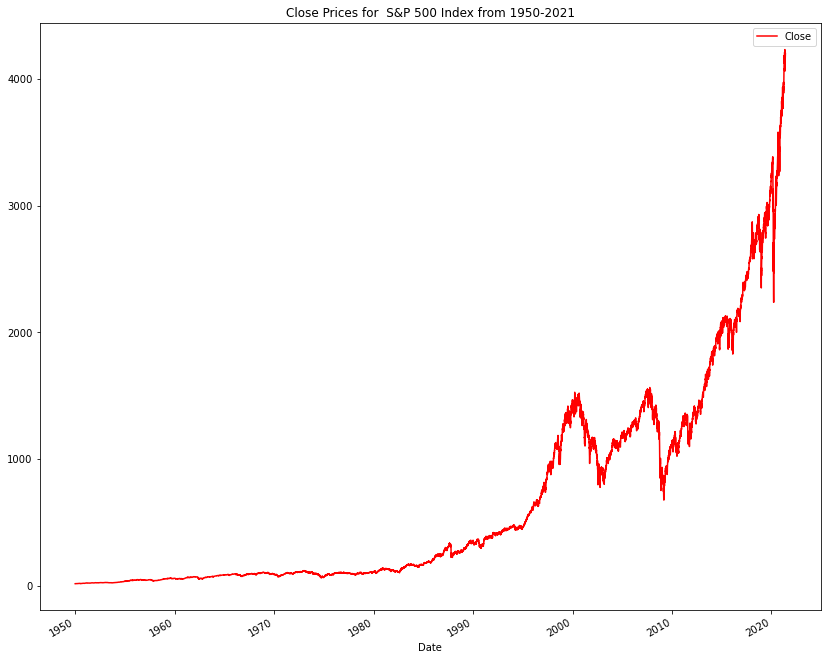

In [508]:
df_fig[['Close']].plot(figsize=(14,12),color='r', title = 'Close Prices for  S&P 500 Index from 1950 to Present Days')


Let us divide all data for train and test bases, the first for algorithm learning, 
the second for test and implementation of the program for prediction. 


In [509]:
train = data[data["Date"] < datetime(year=2015, month=1, day=1)]
test = data[data["Date"] >= datetime(year=2015, month=1, day=1)]
columns = data.columns[1:].tolist()
print(columns)

['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']


So, we will run the Linear Regression algorithm multiple times trying to find out the best set of entering parameters for the best prediction, 
let us write a function for it. The function returns the used parameters and the Mean Absolute Error and R2 score. 

In [510]:
def LinRegEr(train,test,columns,target):
    lr = LinearRegression()
    lr.fit(train[columns], train[target])
    predict = lr.predict(test[columns])
    mse = mean_squared_error(test[target],predict)
    mae = mean_absolute_error(test[target],predict)
    r2 = r2_score(test[target], predict)
    return print('If we use', columns, 'as features, the mae =', round(mae,3), ' R2 score = ', round(r2,5))

Let us generate more indicators for further prediction: average, and standard deviation for the last 5, 30, and 356 days.
The following mean and Standard Deviation functions use data in the row and the rows above, so let us shift 
the data in columns, so that the current value does not be included in the calculation of average parameters. 


In [511]:
df_Shift = data.copy()
df_Shift[columns] = df_Shift[columns].shift(periods=1, freq=None, axis=0)
print(df_Shift.head())

            Date   Open   High    Low  Close     Volume  Adj Close
16589 1950-01-03    NaN    NaN    NaN    NaN        NaN        NaN
16588 1950-01-04  16.66  16.66  16.66  16.66  1260000.0      16.66
16587 1950-01-05  16.85  16.85  16.85  16.85  1890000.0      16.85
16586 1950-01-06  16.93  16.93  16.93  16.93  2550000.0      16.93
16585 1950-01-09  16.98  16.98  16.98  16.98  2010000.0      16.98


The functions of average mean and standard deviation using the number of days as input value:

In [512]:
def aver(n,col):
    ns = str(n)
    df_Shift['Av_'+ns+' '+col] =df_Shift[col].rolling(window=n).mean()
    return df_Shift

In [513]:
def Std(n,col):
    ns = str(n)
    df_Shift['Std_'+ns+' '+col] =df_Shift[col].rolling(window=n).std()
    return df_Shift

Let us implement these functions for our shifted table:

In [514]:
for n in [5,30,365]:
    for col in ['Close','Volume']:
        aver(n,col)

In [515]:
for n in [5,365]:
    for col in ['Close','Volume']:
        Std(n,col)

We can try to use other indicators, for example, the ratios of rolling values for 5 days to the same indicator for a whole year:

In [516]:
df_Shift['Av5to365']=df_Shift['Av_5 Close']/df_Shift['Av_365 Close']
df_Shift['Std5to365']=df_Shift['Std_5 Close']/df_Shift['Std_365 Close']

Now, when we calculated the indicators, let us shift the Date column to return data to the initial state,
but with new indicators added. 


In [517]:
df_Shift['Date'] = df_Shift['Date'].shift(periods=1, freq=None, axis=0)
print(df_Shift.head(2))

            Date   Open   High    Low  Close     Volume  Adj Close  \
16589        NaT    NaN    NaN    NaN    NaN        NaN        NaN   
16588 1950-01-03  16.66  16.66  16.66  16.66  1260000.0      16.66   

       Av_5 Close  Av_5 Volume  Av_30 Close  Av_30 Volume  Av_365 Close  \
16589         NaN          NaN          NaN           NaN           NaN   
16588         NaN          NaN          NaN           NaN           NaN   

       Av_365 Volume  Std_5 Close  Std_5 Volume  Std_365 Close  \
16589            NaN          NaN           NaN            NaN   
16588            NaN          NaN           NaN            NaN   

       Std_365 Volume  Av5to365  Std5to365  
16589             NaN       NaN        NaN  
16588             NaN       NaN        NaN  


In [518]:
df_Ready= df_Shift.copy()
df_fig = df_Ready[df_Ready['Date'] >= datetime(year=1980, month=1, day=1)]
df_fig = df_fig.set_index('Date')


The picture of Closing Prices and its Moving Average for the previous year:   

<AxesSubplot:xlabel='Date'>

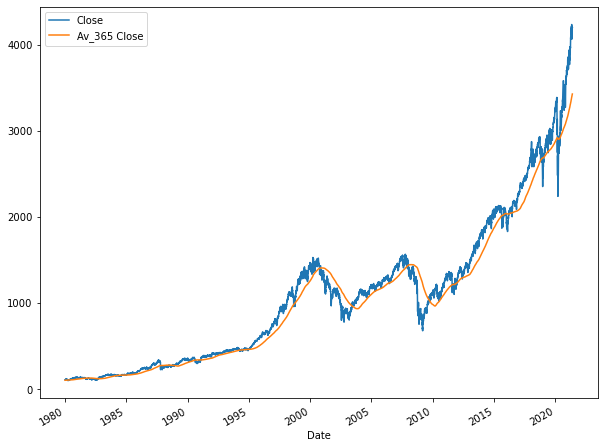

In [519]:
df_fig[['Close','Av_365 Close']].plot(figsize=(10,8))

The Picture of Sales Volume and its moving average for last year:

<AxesSubplot:xlabel='Date'>

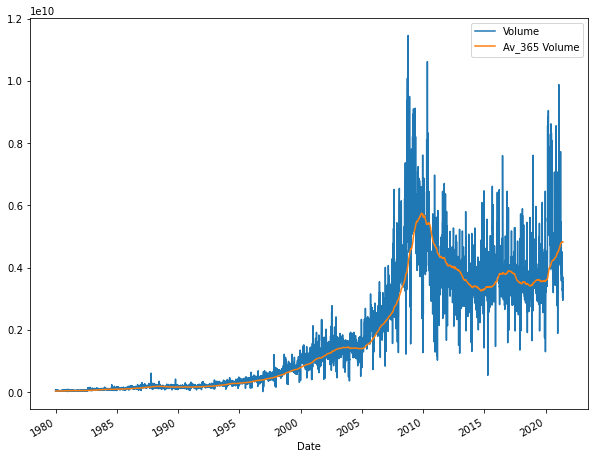

In [520]:
df_fig[['Volume', 'Av_365 Volume']].plot(figsize=(10,8))

So, we use the data to calculate the average for a whole year before, we have sufficient data for it starting from 1951.

Let us add columns with info on the day, month, and year. 
It could help us take into account the seasonability when the algorithm will make a prediction. 

In [521]:
df = df_Ready[df_Ready["Date"] > datetime(year=1951, month=1, day=2)].dropna(axis=0)
df['D_Day']=df['Date'].dt.day
df['D_Month']=df['Date'].dt.month
df['D_Year']=df['Date'].dt.year


Our goal is to predict Close prices, so let us remove Close columns from the list of entering parameters:

In [522]:
columns = df.columns.tolist()
columns.remove('Close')
columns.remove('Adj Close')
print(columns)

['Date', 'Open', 'High', 'Low', 'Volume', 'Av_5 Close', 'Av_5 Volume', 'Av_30 Close', 'Av_30 Volume', 'Av_365 Close', 'Av_365 Volume', 'Std_5 Close', 'Std_5 Volume', 'Std_365 Close', 'Std_365 Volume', 'Av5to365', 'Std5to365', 'D_Day', 'D_Month', 'D_Year']


In [523]:
train =df[df["Date"] < datetime(year=2015, month=1, day=1)]
test = df[df["Date"] >= datetime(year=2015, month=1, day=1)]

In [524]:
col_initial = columns[1:5]
print(col_initial)
col_all=columns[1:]
print(coll_all)

['Open', 'High', 'Low', 'Volume']
['Open', 'High', 'Low', 'Volume', 'Av_5 Close', 'Av_5 Volume', 'Av_30 Close', 'Av_30 Volume', 'Av_365 Close', 'Av_365 Volume', 'Std_5 Close', 'Std_5 Volume', 'Std_365 Close', 'Std_365 Volume', 'Av5to365', 'Std5to365', 'D_Day', 'D_Month', 'D_Year']


Predictions using Initial data only, initial data+calculated parameters, and calculated parameters only:

In [525]:
LinRegEr(train,test,col_initial,'Close')

If we use ['Open', 'High', 'Low', 'Volume'] as features, the mae = 6.454  R2 score =  0.99966


In [526]:
LinRegEr(train,test, col_all,'Close')

If we use ['Open', 'High', 'Low', 'Volume', 'Av_5 Close', 'Av_5 Volume', 'Av_30 Close', 'Av_30 Volume', 'Av_365 Close', 'Av_365 Volume', 'Std_5 Close', 'Std_5 Volume', 'Std_365 Close', 'Std_365 Volume', 'Av5to365', 'Std5to365', 'D_Day', 'D_Month', 'D_Year'] as features, the mae = 6.361  R2 score =  0.99967


In [527]:
LinRegEr(train,test,col_with_param,'Close')

If we use ['Av_5 Close', 'Av_5 Volume', 'Av_30 Close', 'Av_30 Volume', 'Av_365 Close', 'Av_365 Volume', 'Std_5 Close', 'Std_5 Volume', 'Std_365 Close', 'Std_365 Volume', 'Av5to365', 'Std5to365', 'D_Day', 'D_Month', 'D_Year'] as features, the mae = 19.836  R2 score =  0.9969


As we can see, the highest accuracy we gain when we used all initial columns with all calculated indicators columns. 
Let us try to combine parameters trying to reduce the error of prediction even more. 
We will write a function for choosing parameters using different keywords (regular expressions):

In [528]:
def choose_feat(listc, regex):
    features = []
    for k in listc:
        k =str(k)
        if regex in k:
                features.append(k)
    return features
    

and implement this function for getting different sets of initial columns:

In [529]:
p1 = choose_feat(col_all, 'Av_')

In [530]:
p2 = choose_feat(col_all, 'Std_')
p3 = choose_feat(col_all, 'Volume')
p4 = choose_feat(col_all, '5to365')
p5 = choose_feat(col_all, '365')

p6 = choose_feat(col_all, '_5')

p7 = choose_feat(col_all, '30')
p8=choose_feat(col_all, 'D_')

Let try these different sets for choosing optimal enter parameters:

In [531]:

for p in [p1,p2,p3,p4,p5,p6,p7,p8]:
    LinRegEr(train,test,p,'Close')
    

If we use ['Av_5 Close', 'Av_5 Volume', 'Av_30 Close', 'Av_30 Volume', 'Av_365 Close', 'Av_365 Volume'] as features, the mae = 19.604  R2 score =  0.99689
If we use ['Std_5 Close', 'Std_5 Volume', 'Std_365 Close', 'Std_365 Volume'] as features, the mae = 1079.994  R2 score =  -3.32099
If we use ['Volume', 'Av_5 Volume', 'Av_30 Volume', 'Av_365 Volume', 'Std_5 Volume', 'Std_365 Volume'] as features, the mae = 1013.334  R2 score =  -5.25998
If we use ['Av5to365', 'Std5to365'] as features, the mae = 2180.941  R2 score =  -15.52799
If we use ['Av_365 Close', 'Av_365 Volume', 'Std_365 Close', 'Std_365 Volume', 'Av5to365', 'Std5to365'] as features, the mae = 159.259  R2 score =  0.78295
If we use ['Av_5 Close', 'Av_5 Volume', 'Std_5 Close', 'Std_5 Volume'] as features, the mae = 20.134  R2 score =  0.99688
If we use ['Av_30 Close', 'Av_30 Volume'] as features, the mae = 55.784  R2 score =  0.97483
If we use ['D_Day', 'D_Month', 'D_Year'] as features, the mae = 1327.855  R2 score =  -5.60815


The other approach to choose the optimal parameters is to look at correlation between different columns and choose to best correlated with target Close column:

In [532]:
df.corr()['Close']

Open              0.999924
High              0.999960
Low               0.999963
Close             1.000000
Volume            0.801964
Adj Close         1.000000
Av_5 Close        0.999889
Av_5 Volume       0.811289
Av_30 Close       0.999199
Av_30 Volume      0.820283
Av_365 Close      0.992883
Av_365 Volume     0.824022
Std_5 Close       0.682917
Std_5 Volume      0.617118
Std_365 Close     0.863295
Std_365 Volume    0.750197
Av5to365          0.095018
Std5to365         0.094878
D_Day            -0.001092
D_Month          -0.010320
D_Year            0.847276
Name: Close, dtype: float64

In [533]:
param = df.columns.tolist()
print(param)

['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close', 'Av_5 Close', 'Av_5 Volume', 'Av_30 Close', 'Av_30 Volume', 'Av_365 Close', 'Av_365 Volume', 'Std_5 Close', 'Std_5 Volume', 'Std_365 Close', 'Std_365 Volume', 'Av5to365', 'Std5to365', 'D_Day', 'D_Month', 'D_Year']


Our goal is predict Close prices, so let us remove Close columns from the list of enter parameters:

In [534]:
par1 = ['Open','High', 'Low', 'Av_5 Close', 'Av_30 Close', 'Av_365 Close','D_Year']
LinRegEr(train,test,par1,'Close')

If we use ['Open', 'High', 'Low', 'Av_5 Close', 'Av_30 Close', 'Av_365 Close', 'D_Year'] as features, the mae = 6.316  R2 score =  0.99967


In [535]:
par2 = ['Open', 'High', 'Low', 'Av_5 Close', 'Av_5 Volume', 'Av_30 Close', 'D_Year']
LinRegEr(train,test,par2,'Close')

If we use ['Open', 'High', 'Low', 'Av_5 Close', 'Av_5 Volume', 'Av_30 Close', 'D_Year'] as features, the mae = 6.312  R2 score =  0.99967


In [536]:
par3 = ['Open', 'High', 'Low', 'Volume', 'Av_5 Close', 'Av_30 Close']
LinRegEr(train,test,par3,'Close')

If we use ['Open', 'High', 'Low', 'Volume', 'Av_5 Close', 'Av_30 Close'] as features, the mae = 6.301  R2 score =  0.99967


In [537]:
par4 = ['Open', 'High', 'Low', 'Av_5 Close', 'Av_30 Close']

In [538]:
LinRegEr(train,test,par4,'Close')

If we use ['Open', 'High', 'Low', 'Av_5 Close', 'Av_30 Close'] as features, the mae = 6.302  R2 score =  0.99967


We can get even better result if we split the initidal data in the ratio 7:1 for training and testing puprose, 
and start our test prediction from 2010, not 2015:
        

In [540]:
train =df[df["Date"] < datetime(year=2010, month=1, day=1)]
test = df[df["Date"] >= datetime(year=2010, month=1, day=1)]
par5 = ['Open', 'High', 'Low', 'Av_5 Close', 'Av_30 Close'] 
LinRegEr(train,test,par5,'Close')

If we use ['Open', 'High', 'Low', 'Av_5 Close', 'Av_30 Close'] as features, the mae = 5.176  R2 score =  0.99988


# Summary

In this project, the linear regression model was used for the prediction of S&P 500 Indicators. 

The data from 1950 to the present date was used. 
I can make a prediction using the initial columns only, but the result is better if we input some indicators as moving average and standard deviation for the last  5, 30, and 365 years, and ratios of these indicators for 5 days to whole years. 

We have found the optimal ratio to make a prediction is to divide the initial data in ratio 7:1, and the optimal amount of parameters to minimize the error. 

But using the 'optimal' parameters leads to overfitting the model, and I can recommend using all the above-mentioned parameters to make a prediction.  